<a href="https://colab.research.google.com/github/Anoop7485/HealthAppointment-No-show/blob/main/Medical_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
#uploading the dataset
df=pd.read_csv("/content/Medical appointment no shows.csv")

In [ ]:
#To read first five members
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#To find last five
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
#checking null values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [ ]:


#Check if we have any NaN values in the dataset
df.isna().any().any() # returns True if there are any NaNs, False otherwise

np.False_

In [ ]:
#remove duplicates in dataset
df.drop_duplicates(inplace=True)
print(df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

converting into categorical values

In [ ]:
df['No-show ']=df['No-show'].map({'Yes':0,'No':1})
df['Gender']=df['Gender'].map({'F':0,'M':1})
df['ScheduledDay']=df['ScheduledDay'].map({'F':0,'M':1}) # Assuming 'scheduledDay' contains 'F' and 'M'
df['AppointmentDay']=df['AppointmentDay'].map({'F':0,'M':1}) # Assuming 'AppointmentDay' contains 'F' and 'M'
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood'], drop_first=True)


In [ ]:

df = df.drop(['PatientId','AppointmentID'], axis=1)#axis=1 indicates for columns and axis=0 indicates row

In [ ]:


X = df.drop(['No-show'], axis=1)
y = df['No-show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00     17669
         Yes       1.00      1.00      1.00      4437

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106

Accuracy: 1.0


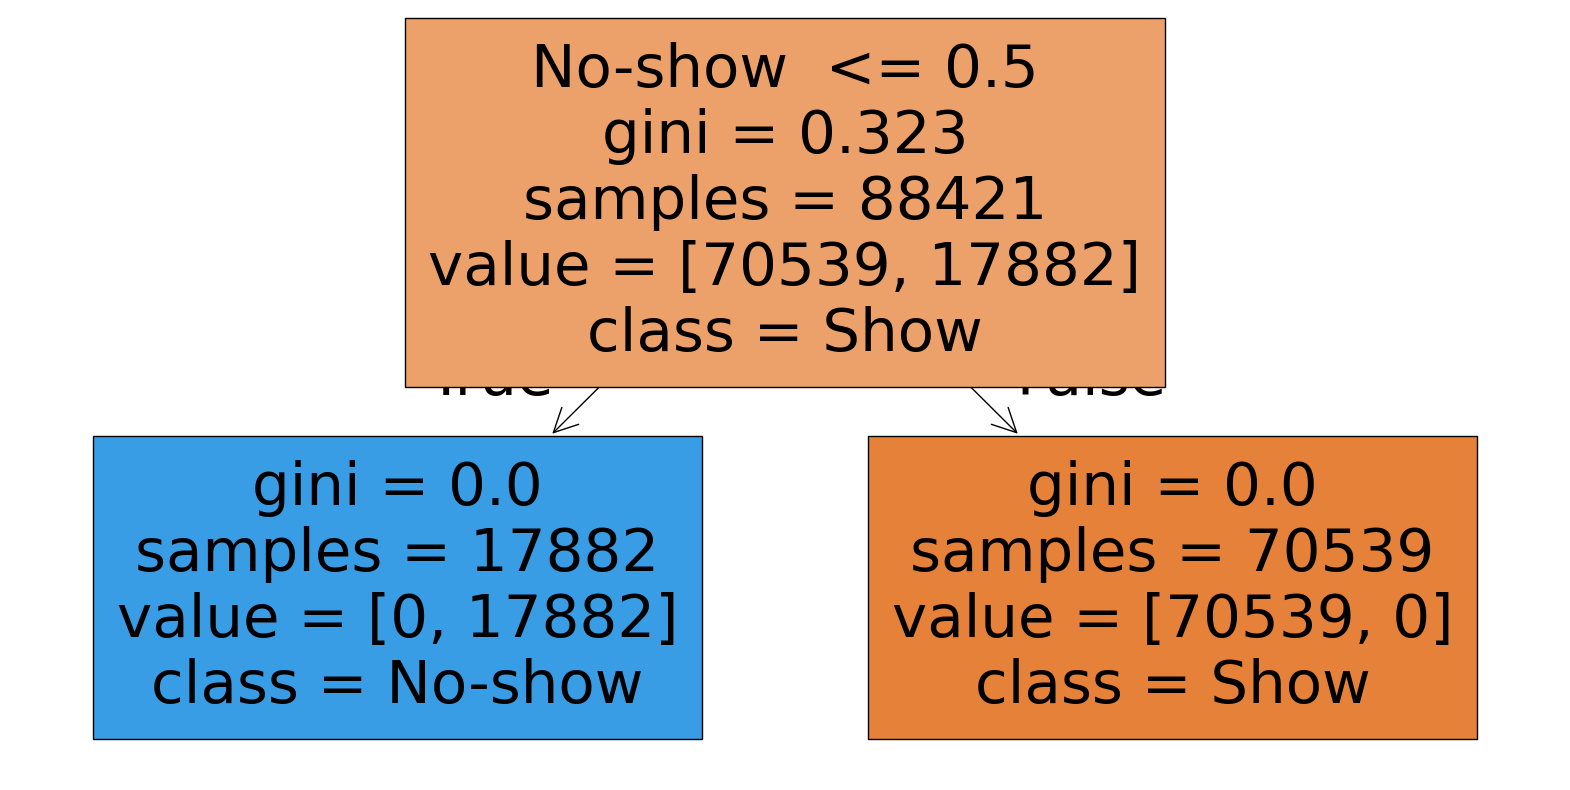

In [ ]:


plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Show', 'No-show'], filled=True)
plt.show()


In [ ]:
features=['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

x=df[features]
y=df['No-show']

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier()

In [ ]:
print(dtree.predict([[20,0,1,0,0,0,0]]))


['No']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

# Group by SMS_received and calculate average no-show rate
sms_trend = df.groupby('SMS_received')['No-show'].mean()

print(sms_trend)

SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64


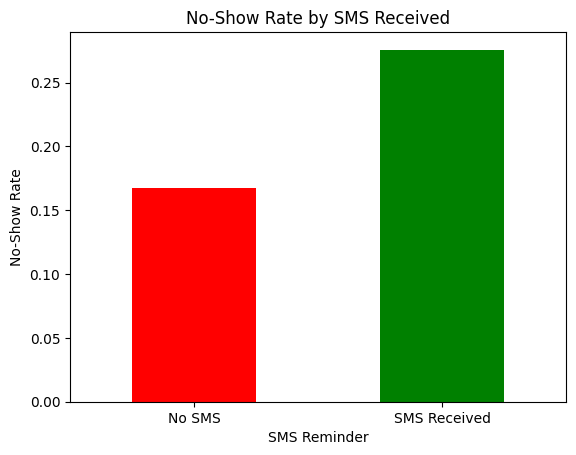

In [ ]:


sms_trend.plot(kind='bar', color=['red', 'green'])
plt.title('No-Show Rate by SMS Received')
plt.xticks([0, 1], ['No SMS', 'SMS Received'], rotation=0)#xticks() used to set the numbers into strings like recived and not received
plt.ylabel('No-Show Rate')
plt.xlabel('SMS Reminder')

plt.show()


<ipython-input-47-081f1c621d41>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trends = df.groupby('AgeGroup')['No-show'].mean()


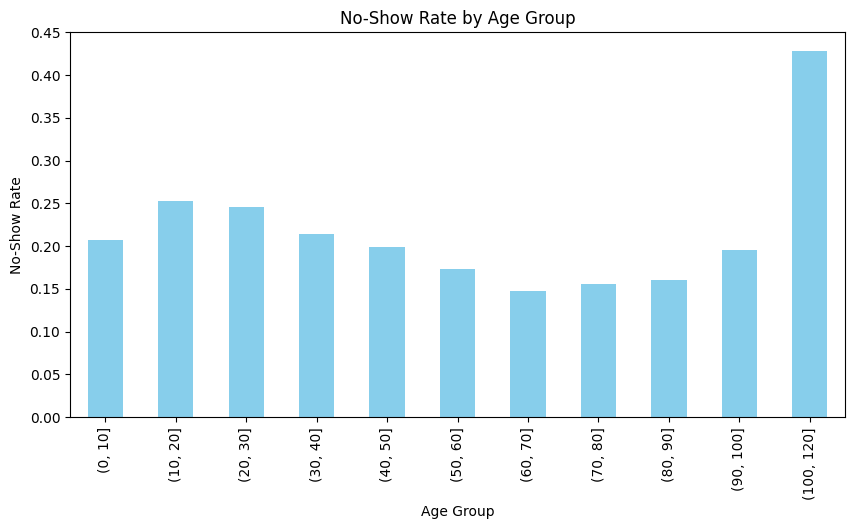

In [ ]:


# Group by age
age= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
df['AgeGroup'] = pd.cut(df['Age'], bins=age)

# Calculate no-show rate per age group
age_trends = df.groupby('AgeGroup')['No-show'].mean()

# Plot
age_trends.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('No-Show Rate by Age Group')
plt.ylabel('No-Show Rate')
plt.xlabel('Age Group')

plt.show()

In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create a new column for Weekday
df['Weekday'] = df['AppointmentDay'].dt.day_name()

In [ ]:
# Group by weekday and calculate the average no-show rate
weekday_trend = df.groupby('Weekday')['No-show'].mean()

# Optional: Reorder the weekdays properly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trend = weekday_trend.reindex(weekday_order)


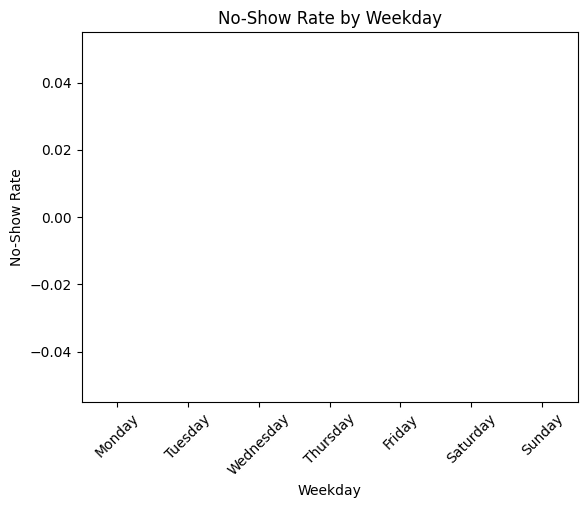

In [ ]:


# Plotting the weekday trend
weekday_trend.plot(kind='bar', color='skyblue')
plt.title('No-Show Rate by Weekday')
plt.ylabel('No-Show Rate')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df['No-show'].value_counts())#checking whether the patients missed their Appointments or not



No-show
0    88208
1    22319
Name: count, dtype: int64
